# **Statistics in Python: Hypothesis Tests and ANOVA**

In this note, we will learn how to implement statistical tools in Python, `statsmodels`, to walk through various hypothesis tests. Also we will show `searborn` is a powerful to combine statistical analysis and visualization.
The data is given from the website Ref. [[1]](http://lib.stat.cmu.edu/datasets/CPS_85_Wages). The note follows the Ref. [[2](http://www.scipy-lectures.org/packages/statistics/index.html#hypothesis-testing-comparing-two-groups),[3](http://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/)].

## 0. The DATA

In [8]:
import pandas as pd
import numpy as np
import urllib.request
import os
import math

if not os.path.exists('wages.txt'):
    # Download the file if it is not present
    urllib.request.urlretrieve('http://lib.stat.cmu.edu/datasets/CPS_85_Wages','wages.txt')

names = ['EDUCATION', 'SOUTH', 'GENDER', 'EXPERIENCE', 'UNION', 'WAGE', 'AGE', 'RACE', 'OCCUPATION', 'SECTOR','MARR']
data = pd.read_csv('wages.txt', skiprows=27, skipfooter=6, sep=None,header=None)
data.columns = names

/Users/hhhung/anaconda/lib/python3.4/site-packages/pandas/io/parsers.py:648: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.
  ParserWarning)


In [5]:
data.head()

,EDUCATION,SOUTH,GENDER,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR
0,8,0,1,21,0,5.10,35,2,6,1,1
1,9,0,1,42,0,4.95,57,3,6,1,1
2,12,0,0,1,0,6.67,19,3,6,1,0
3,12,0,0,4,0,4.00,22,3,6,0,0
4,12,0,0,17,0,7.50,35,3,6,0,1


The explanation of the features is as follows:
* **EDUCATION**: Number of years of education.
* **SOUTH**: Indicator variable for Southern Region (1=Person lives in South, 0=Person lives elsewhere).
* **GENDER**: Indicator variable for sex (1=Female, 0=Male).
* **EXPERIENCE**: Number of years of work experience.
* **UNION**: Indicator variable for union membership (1=Union member, 0=Not union member).
* **WAGE**: Wage (dollars per hour).
* **AGE**: Age (years).
* **RACE**: Race (1=Other, 2=Hispanic, 3=White).
* **OCCUPATION**: Occupational category (1=Management, 2=Sales, 3=Clerical, 4=Service, 5=Professional, 6=Other).
* **SECTOR**: Sector (0=Other, 1=Manufacturing, 2=Construction).
* **MARR**: Marital Status (0=Unmarried, 1=Married)

In [116]:
data.shape

(534, 11)

## **1. Mean Values and Standard Deviations By Groups**

In [2]:
for gender in [0, 1]:
    groupBy = data[data['GENDER']==gender]['WAGE']
    print (gender, groupBy.mean(), groupBy.std())

0 9.994913494809687 5.285854492717833
1 7.878857142857144 4.72011334609668


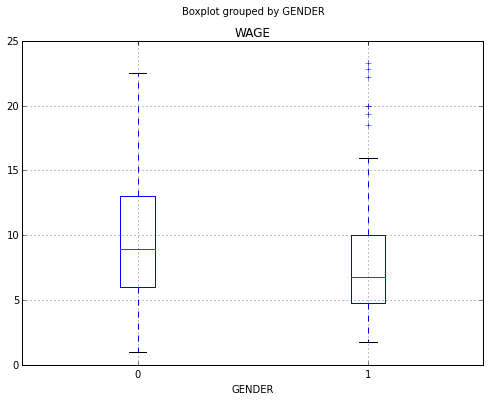

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
data.boxplot('WAGE', by='GENDER', figsize=(8, 6))
plt.ylim(0,25)
plt.show()

## **2. Data Visualization: Scatter Matrix Plot **

In [12]:
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

### **2.1 Total population: (diagonal plots are histograms)**

/Users/hhhung/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


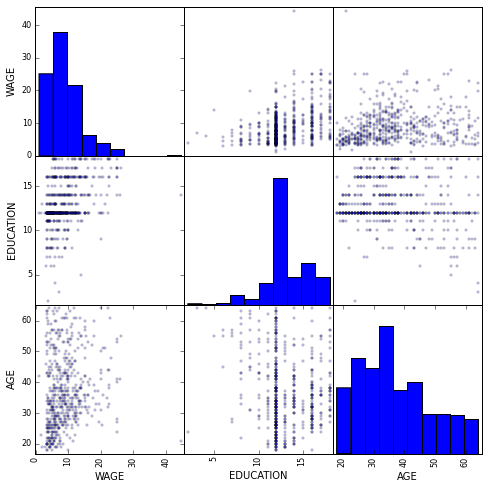

In [13]:
scatter_matrix(data[['WAGE','EDUCATION','AGE']], alpha=0.2, figsize=(8,8));

### **2.2 Scatter Matrix Plot for Male Only**

/Users/hhhung/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


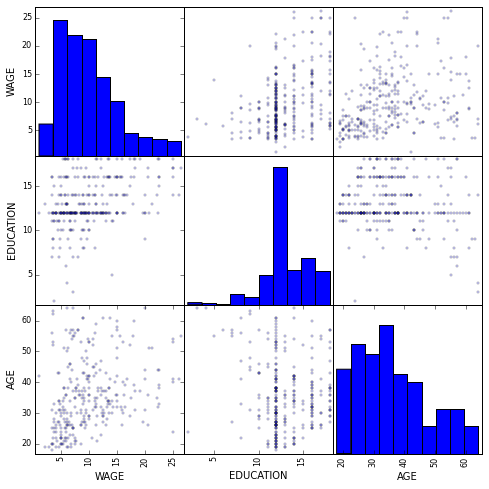

In [14]:
scatter_matrix(data[data['GENDER'] == 0][['WAGE','EDUCATION','AGE']], alpha=0.2, figsize=(8,8));

### **2.3 Scatter Matrix Plot for Female Only**

/Users/hhhung/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


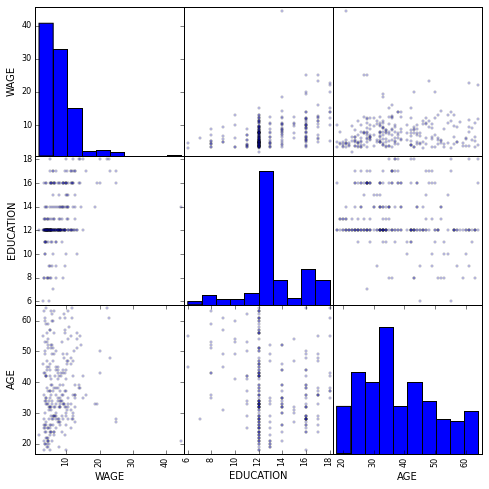

In [15]:
scatter_matrix(data[data['GENDER'] == 1][['WAGE','EDUCATION','AGE']], alpha=0.2, figsize=(8,8));

# **3. Hypothesis tests**

In [2]:
from scipy import stats

### **3.1 One-sample t-test and confidence interval**

First we test the null hypothesis as $H_0: \textrm{WAGE} = 0$ for all populations and the alternative hypothesis is $H_a: \textrm{WAGE} \ne 0$:

In [122]:
stats.ttest_1samp(data['WAGE'], popmean = 0)

Ttest_1sampResult(statistic=40.57756449278039, pvalue=3.959532591208198e-165)

So the test statistics is 40.57... and P-value is much smaller than 0.05. So the null hypothesis mean value of **WAGE** = 0 can be rejected and we adopt the alternative hypothesis. We can check the mean and standard deviation of **WAGE**:

In [123]:
print ('mean=', data['WAGE'].mean(), ', std=', data['WAGE'].std())

mean= 9.024063670411985 , std= 5.139096854140681


From this we can estimate the 95% confidence interval of **WAGE** is 
### $$ \bar{X} \pm Z^* \frac{s}{\sqrt{n}} = 9.024 \pm 1.96 \times \frac{5.139}{\sqrt{534}} = 9.024 \pm 0.436 = [8.588, 9.46]$$
Therefore, the probability of the existing samples to have mean = 0 is P-value $=4 \times 10^{-165}$, meaning it is extremely unlikely to happen. (Note if $n<30$, we need to check t-Table, from [here](https://www2.palomar.edu/users/rmorrissette/Lectures/Stats/ttests/ttests.htm).) This process is equivalent to doing:

In [9]:
stats.t.interval(0.95,                        # Confidence level
                 df = 533,                     # Degrees of freedom
                 loc = data.WAGE.mean(), # Sample mean
                 scale= data.WAGE.std()/math.sqrt(534))

(8.5871943305739897, 9.4609330102499811)

### **3.2 Two-sample t-test**

Recall that for male and female groups, we have

In [124]:
for gender in [0, 1]:
    groupBy = data[data['GENDER']==gender]['WAGE']
    print (gender, groupBy.mean(), groupBy.std())

0 9.994913494809687 5.285854492717833
1 7.878857142857144 4.72011334609668


Are these two groups certainly different from each other? The null hypothesis as $H_0: \textrm{WAGE}_{male} = \textrm{WAGE}_{female}$ or $H_0: \textrm{WAGE}_{male}-\textrm{WAGE}_{female} =0$ and the alternative hypothesis is $H_a: \textrm{WAGE}_{male} - \textrm{WAGE}_{female} \ne 0$. The two-sample test can be implemented by [scipy.stats.ttest_ind()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html#scipy.stats.ttest_ind):

In [125]:
female_viq = data[data['GENDER'] == 1]['WAGE']
male_viq = data[data['GENDER'] == 0]['WAGE']
stats.ttest_ind(female_viq, male_viq) 

Ttest_indResult(statistic=-4.8400668061689034, pvalue=1.7032659492725048e-06)

We see the P-value is also small, so the null hypothesis that they are the same can be rejected and we adopt $H_a$. Thus there exists discrepancy of the **WAGE** between the male and female groups.

### 3.3 Paired tests

Let's check **AGE** and **EXPERIENCE**. Does older mean more experience? (Of course it is not always true.) The null hypothesis is $H_0: \textrm{AGE} = \textrm{EXPEREIENCE}$. However, if we directly do two-sample test `stats.ttest_ind(data['AGE'], data['EXPEREIENCE'])`, we ignore one critical point: **each pair of them origins from the same observation** and make a wrong conclusion. To perform paired test,

In [126]:
stats.ttest_rel(data['AGE'], data['EXPERIENCE'])

Ttest_relResult(statistic=168.15789480278013, pvalue=0.0)

This is equivalent to which we create a **DIFF** column in dataFrame:

In [128]:
data['DIFF'] = pd.Series(data['AGE']-data['EXPERIENCE'], index=data.index)

In [129]:
data.head()

,EDUCATION,SOUTH,GENDER,EXPERIENCE,UNION,WAGE,AGE,RACE,OCCUPATION,SECTOR,MARR,DIFF
0,8,0,1,21,0,5.10,35,2,6,1,1,14
1,9,0,1,42,0,4.95,57,3,6,1,1,15
2,12,0,0,1,0,6.67,19,3,6,1,0,18
3,12,0,0,4,0,4.00,22,3,6,0,0,18
4,12,0,0,17,0,7.50,35,3,6,0,1,18


In [130]:
stats.ttest_1samp(data['DIFF'], popmean = 0)

Ttest_1sampResult(statistic=168.15789480278013, pvalue=0.0)

Since the P-value is extremely smaller than the significance level $\alpha =0.05$, we reject the null hypothesis. Thus  **AGE** and **EXPERIECE** are different. (Of courser, this is a trivial test) We can also wonder if education is helpful to consider as experience?

## 4. Simple Linear Model Hypothesis Test

Next step we will test the hypothesis of a linear model:
### $$ y = \theta_0 + \theta_1 x + \epsilon,$$
where $\epsilon$ is the noise. We will test the null hypothesis in which the coefficients $\theta_0$ and $\theta_1$ are zero. We will use the [statsmodels](http://statsmodels.sourceforge.net) module and [ordinary least squares](https://en.wikipedia.org/wiki/Ordinary_least_squares) (OLS) to test.

In [65]:
from statsmodels.formula.api import ols

### 4.1 A toy test

First, let's do a trivial test:

In [9]:
import numpy as np
x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
trivialData = pd.DataFrame({'x': x, 'y': y})

Here we simulated data, generated by $y = -5+3x+\epsilon$ and $\epsilon$ is obtained by normal distribution. Then use `statmodels` module, we reversely check if y is linear to x:

In [10]:
model = ols("y ~ x", trivialData).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Sat, 19 Nov 2016   Prob (F-statistic):           8.56e-08
Time:                        11:19:24   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

We can see $\theta_0 = -5.5335 \pm 1.036$ and $\theta_1 = 2.9369$, which are close to our initial setup -5 and 3. The model has $R^2 =0.804$, meaning cover $80\%$ variance. The t-statistics are all larger than 1.96, with very small P-values. Thus we can reject the null hypothesis that both coefficents are zeros, i.e. they are nonzero.

### 4.2 Linear models: AGE vs WAGE and EDUCATION vs WAGE

After the toy test, we can further to apply it to our problems. From the scatter matrix plot in **Sect. 2.1**, we can observe the linearity in the plots $X_{AGE}$ vs $Y_{WAGE}$, and $X_{EDUCATION}$ and $Y_{WAGE}$. Therefore, we can assume a linear model:
### $$Y_{\textrm{WAGE}} = \theta_0 + \theta_1 X_{\textrm{AGE}}  + \epsilon$$
Various of $(X,Y)$ give different $\theta$, so the collection of $\theta$ can be statistically tested. The null hypothesis is $H_0: \theta_{0}=\theta_1=0$ and the alternative hypothesis $H_a: \theta_0\ne 0 \textrm{ or  } \theta_1 \ne 0$. Now we can test the linear model hypothesis:

In [135]:
model = ols("WAGE ~ AGE", data).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     17.20
Date:                Sat, 19 Nov 2016   Prob (F-statistic):           3.92e-05
Time:                        17:08:55   Log-Likelihood:                -1622.8
No. Observations:                 534   AIC:                             3250.
Df Residuals:                     532   BIC:                             3258.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.1675      0.723      8.533      0.0

 and 
 ### $$Y_{\textrm{WAGE}} = \theta_0 + \theta_1 X_{\textrm{EDUCATION}}  + \epsilon$$

In [136]:
model = ols("WAGE ~ EDUCATION", data).fit()
print (model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     90.85
Date:                Sat, 19 Nov 2016   Prob (F-statistic):           5.47e-20
Time:                        17:09:26   Log-Likelihood:                -1589.2
No. Observations:                 534   AIC:                             3182.
Df Residuals:                     532   BIC:                             3191.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.7460      1.045     -0.714      0.4

From the tests, we can reject the null hypothesis that $\theta_1=0$ for both cases, but no enough evidence to claim $\theta_0 =0$ or $\theta_0 \ne 0$ if the predictor is **EDUCATION**. Large values of $R^2$ represents that the linear model worsk well since it accounts for the data variance.

### 4.2 Categorical variable

Previously we have performed two-sample test to show that **WAGE** is different for male and female groups. Next we can ask what is relation between **WAGE** and **GENDER**? To study this, we test the linear model 
### $$Y_{\textrm{WAGE}}=\theta_0 + \theta_1 X_{\textrm{GENDER}} +\epsilon$$ 
and $X_{\textrm{GENDER}}=0/1$ is categorical for female/male. `statsmodels` treats a categorical variable with K possible values as K-1 ‘dummy’ boolean variables. The null hypothesis is $H_0: \theta_{0,1}=0$, and the alternative hypothesis $H_a: \theta_0\ne 0 \textrm{ or  } \theta_1 \ne 0$.

In [137]:
model = ols("WAGE ~ GENDER + 1", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     23.43
Date:                Sat, 19 Nov 2016   Prob (F-statistic):           1.70e-06
Time:                        17:10:55   Log-Likelihood:                -1619.8
No. Observations:                 534   AIC:                             3244.
Df Residuals:                     532   BIC:                             3252.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.9949      0.296     33.751      0.0

The test-statistics shows that we can reject the null hypothesis $\theta_0 = \theta_1 =0$ and adopt the alternative hypothesis. Meanwhile, note that the coefficient $\theta_1$ is negative, meaning statistically females have lower wages than males do. This observation is consistent with the two-smaple test in **Sect. 3.2**.

## 5. Analysis of Variance (ANOVA): 

### 5.1 Multiple regression model hypothesis test

Next we go further to test multiple factors for the linear model. The linear model is
### $$Y_{\textrm{WAGE}} = \theta_0 + \theta_1 X_{\textrm{GENDER}} +\theta_2 X_{\textrm{EDUCATION}}+\theta_3 X_{AGE}+ \theta_4 X_{\textrm{RACE}}+\epsilon$$
The null hypothesis is $H_0: \theta_{0,1,2,3,4} =0$ and the alternative hypothesis $H_a: \textrm {either }\theta_i\ne 0$. Then for each coefficient, we can find the test-statistics and P-values:

In [145]:
model = ols('WAGE ~ C(GENDER)+  C(RACE)+ EDUCATION + AGE', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.257
Model:                            OLS   Adj. R-squared:                  0.250
Method:                 Least Squares   F-statistic:                     36.51
Date:                Sat, 19 Nov 2016   Prob (F-statistic):           3.89e-32
Time:                        17:30:06   Log-Likelihood:                -1552.0
No. Observations:                 534   AIC:                             3116.
Df Residuals:                     528   BIC:                             3142.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept         -5.5187      1.339     -4.

By the ANOVA, we can see that most P-values are small except for **RACE**, meaning that it is statistically significant for $\theta_{0,1,2,3} \ne 0$. But we don't have enough evidence to show there exist race discrepancy on wages.

### 5.2 Post-hoc hypothesis testing

Next we can test if the wages of different races are different after removing ages, education and genders? This can be formulated as testing the difference between the coefficient associated to Race 2 and Race 3 in the linear model estimated above (it is an Analysis of Variance, ANOVA). In the above regression, the coefficients are $\theta_0$ = `intercept`, `C(GENDER)[T.1]`, ... `AGE`. To test, we want to test `C(RACE)[T.2] - C(RACE)[T.3]`, with an `F-test`, so the vector is $[0,0,1,-1,0,0]$:

In [147]:
print(model.f_test([0, 0, 1, -1, 0, 0]))

<F test: F=array([[ 0.14269233]]), p=0.7057708121568271, df_denom=528, df_num=1>


In [142]:
model = ols('WAGE ~ C(RACE) + EDUCATION', data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.149
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     31.05
Date:                Sat, 19 Nov 2016   Prob (F-statistic):           1.67e-18
Time:                        17:22:44   Log-Likelihood:                -1588.1
No. Observations:                 534   AIC:                             3184.
Df Residuals:                     530   BIC:                             3201.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept       -1.2463      1.162     -1.073   

### 5.3 Testing for interactions

Next we can further consider whether there exists interaction term in the regression model. As an example, we consider the model:

### $$Y_{\textrm{WAGE}} = \theta_0 + \theta_1 X_{\textrm{GENDER}}+ \theta_2 X_{\textrm{EDUCATION}} +\theta_3 X_{\textrm{GENDER}}X_{\textrm{EDUCATION}}$$

The null hypothesis is $\theta_{3}=0$ and the alternative hypothesis is $H_a: \theta_3 \ne 0$.

In [166]:
result = ols(formula='WAGE ~ EDUCATION + C(GENDER) + EDUCATION * C(GENDER)', data=data).fit()    
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     41.50
Date:                Sat, 19 Nov 2016   Prob (F-statistic):           4.24e-24
Time:                        17:47:39   Log-Likelihood:                -1575.0
No. Observations:                 534   AIC:                             3158.
Df Residuals:                     530   BIC:                             3175.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept               

We can see the P-value = 0.273 > $\alpha=0.05$. Thus we cannot reject the hypothesis. It is unlikely that the existence of the interaction term is necessary.

## 6 Combine Statistical Eexploration And Visualization

Next we introduce the `seaborn` package. It is a Python library to combine statistical analysis and visualization.

In [172]:
import seaborn

/Users/hhhung/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


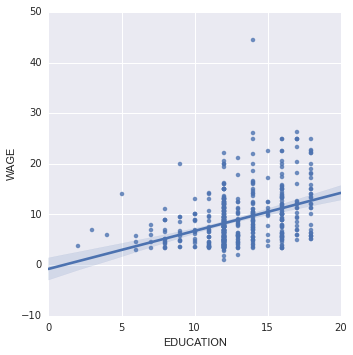

In [173]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data);

With this, we can visualize the simple regression model (line) and the data. The shadow area is the the $95$ confidence interval.

`searborn` can also combine the regression outcome in scatter matrix plots:

/Users/hhhung/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


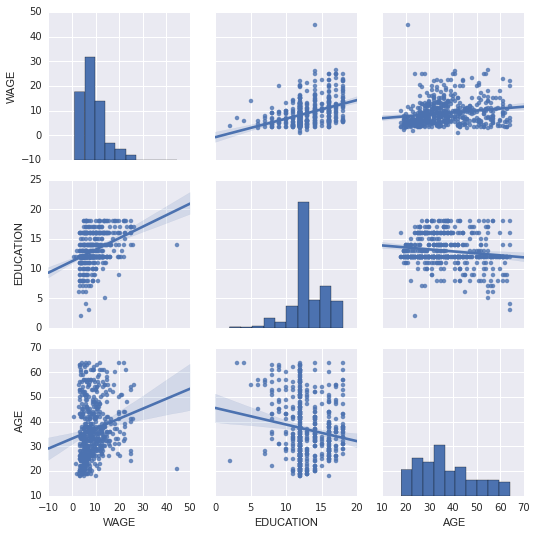

In [174]:
seaborn.pairplot(data, vars=['WAGE','EDUCATION', 'AGE'], kind='reg');

Next the data can be group by **GENDER** and **RACE**, and show the regression outcomes on each group:

/Users/hhhung/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


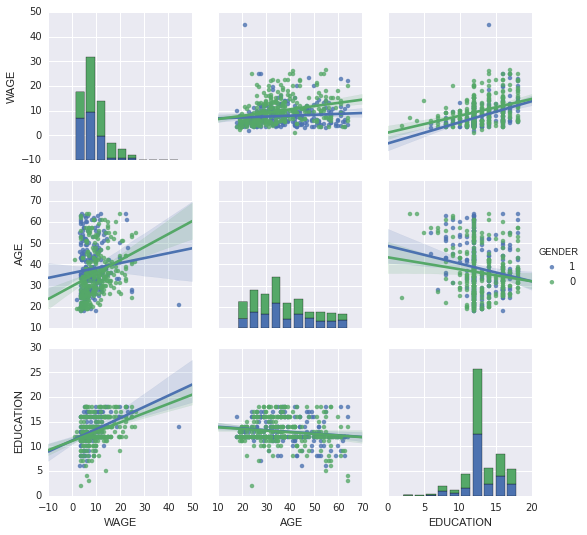

In [175]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg', hue='GENDER');

/Users/hhhung/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


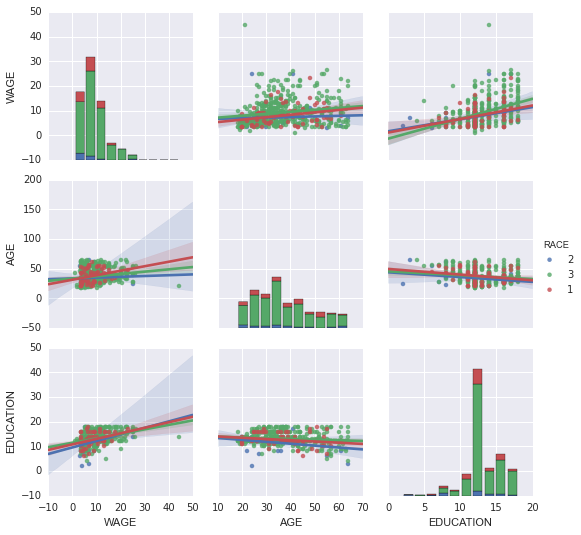

In [176]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'], kind='reg', hue='RACE');

## Reference

1. http://lib.stat.cmu.edu/datasets/CPS_85_Wages
2. [Statistics in Python](http://www.scipy-lectures.org/packages/statistics/index.html#hypothesis-testing-comparing-two-groups)
3. [Four ways to conduct one-way ANOVAs with Python](http://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/)